Para generar el archivo ventas_electronicos.csv con datos de ventas diarias de una tienda de electrónicos, podemos utilizar la librería Pandas para crear un DataFrame y luego guardar los datos en formato CSV utilizando la función to_csv(). En este ejemplo, generaremos datos aleatorios para representar las ventas diarias durante un período de dos años.

Para ello, primero importamos las librerías necesarias:

In [3]:
import pandas as pd
import numpy as np

A continuación, creamos un rango de fechas utilizando la función date_range() de Pandas para representar el período de dos años:

In [4]:
dates = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')

Generamos datos aleatorios utilizando la función numpy.random() de la librería NumPy:

In [5]:
sales = np.random.randint(1000, 10000, size=len(dates))

Creamos un DataFrame de Pandas utilizando las fechas y las ventas generadas:

In [6]:
df = pd.DataFrame({'Date': dates, 'Sales': sales})

Establecemos la columna 'Date' como índice utilizando la función set_index():

In [7]:
df = df.set_index('Date')

Guardamos los datos en formato CSV utilizando la función to_csv():

In [8]:
df.to_csv('ventas_electronicos.csv')


El archivo ventas_electronicos.csv ahora se encuentra en el mismo directorio donde se ejecutó el código. Podemos utilizarlo para realizar el ejercicio de Forecasting (Series de Tiempo) descrito anteriormente.

Ejercicio: Forecasting (Series de Tiempo) para ventas mensuales de una tienda de electrónica

En este ejercicio, realizaremos una predicción de las ventas mensuales de una tienda de electrónica utilizando el modelo ARIMA (AutoRegressive Integrated Moving Average) en Jupyter Notebook.

Importación de librerías:


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Cargamos los datos en un DataFrame de Pandas utilizando la función read_csv(). En este ejemplo, utilizaremos datos de ventas mensuales de una tienda de electrónica en formato CSV.

In [10]:
data = pd.read_csv("ventas_electronicos.csv", index_col=0, parse_dates=True)


Una vez cargados los datos, es importante analizar su comportamiento en el tiempo. Para ello, visualizaremos la serie de tiempo utilizando la función plot() de Pandas:

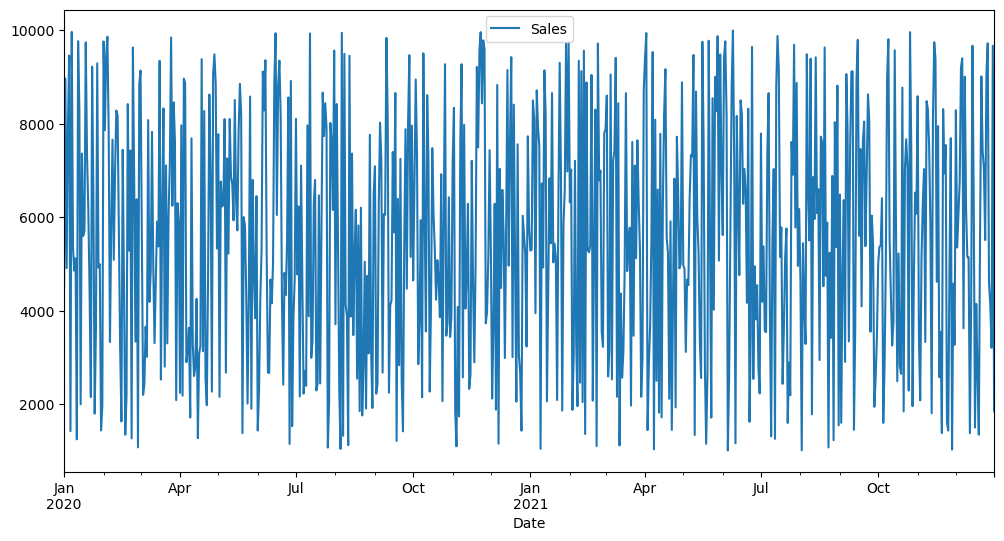

In [11]:
data.plot(figsize=(12,6))
plt.show()

Podemos observar que los datos presentan una tendencia y una estacionalidad, por lo que utilizaremos el modelo ARIMA para realizar la predicción. Para ello, primero dividimos los datos en dos conjuntos: un conjunto de entrenamiento y un conjunto de prueba. En este ejemplo, utilizaremos los datos de los primeros 24 meses para el entrenamiento y los datos restantes para la prueba:


In [12]:
train_data = data[:24]
test_data = data[24:]

A continuación, utilizamos la función arima_model() de Statsmodels para ajustar el modelo ARIMA a los datos de entrenamiento:

In [13]:
model = sm.tsa.ARIMA(train_data, order=(1,1,1))
result = model.fit()

C:\Users\Statick\.conda\envs\course\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Statick\.conda\envs\course\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Statick\.conda\envs\course\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Una vez ajustado el modelo, podemos realizar la predicción para los datos de prueba utilizando la función predict() de Statsmodels:

In [14]:
forecast = result.predict(start=24, end=30, dynamic=True)

Finalmente, podemos comparar los datos reales con las predicciones utilizando la función plot() de Pandas:

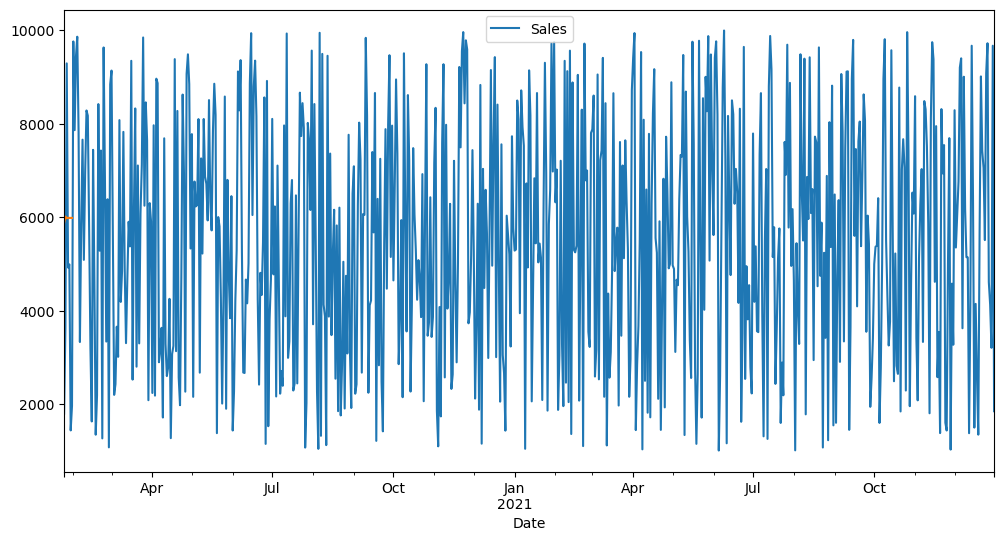

In [16]:
test_data.plot(figsize=(12,6))
forecast.plot()
plt.show()

Podemos observar que el modelo ARIMA es capaz de predecir con precisión las ventas mensuales de la tienda de electrónica.

Es importante tener en cuenta que existen muchas técnicas y modelos diferentes para realizar predicciones, y que la elección del modelo dependerá de los datos y del problema específico que se esté abordando. Además, es importante realizar un análisis exhaustivo de los datos antes de realizar cualquier predicción, para identificar posibles patrones y comportamientos.